In [17]:
!pip install GetOldTweets3
import string
from collections import Counter
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt

In [18]:
def get_tweets():
    import GetOldTweets3 as got 
    tweetCriteria = got.manager.TweetCriteria().setQuerySearch('#coronavirus') \
        .setSince("2020-05-01") \
        .setUntil("2020-07-31") \
        .setMaxTweets(1000)
    
    tweets = got.manager.TweetManager.getTweets(tweetCriteria)
    
    text_tweets = [[tweet.text] for tweet in tweets]
    return text_tweets

In [19]:
text = ""
text_tweets = get_tweets()

length = len(text_tweets)

for i in range(0, length):
    text = text_tweets[i][0] + " " + text

lower_case = text.lower()

cleaned_text = lower_case.translate(str.maketrans('', '', string.punctuation))

tokenized_words = cleaned_text.split()

In [20]:
text_tweets

[['#COVID #coronavirus #football #backtoschool #NBAonTNT @CoachHiggins4'],
 ["WTFauci! How'd we get from #coronavirus to snorkeling?"],
 ['@cenkuygur = POS Stated About Our / My Friend &amp; Patriot “Before he died @THEHermanCain said his God was stronger than #coronavirus. Coronavirus disagreed. #ScienceIsReal “ @dbongino Follows https://twitter.com/dbongino/status/1288984149810913291'],
 ['Oh, so #Coronavirus, gift from #China is racist? Systemic racist? Why don’t you organize a protest march against the racist virus. Just cancel yourself #covididiot. #Topoli'],
 ['Johnson & Johnson #JNJ anunció que su principal candidato a #vacuna, #Ad26.COV2.S, contra el #coronavirus #COVID-19 mostró una protección sólida en estudios preclínicos, al generar una fuerte respuesta de #anticuerpos con una sola dosis.'],
 ['Hermain Cain passed away from #coronavirus after not wearing a mask at 45’s rally...hmmmm #HermanCain'],
 ["Nuestros amigos de @ifmelectronic te invitan al webinar: 'Soluciones de de

In [21]:
stop_words = ["i", "me", "my", "myself", "we", "our", "ours", "ourselves", "you", "your", "yours", "yourself",
              "yourselves", "he", "him", "his", "himself", "she", "her", "hers", "herself", "it", "its", "itself",
              "they", "them", "their", "theirs", "themselves", "what", "which", "who", "whom", "this", "that", "these",
              "those", "am", "is", "are", "was", "were", "be", "been", "being", "have", "has", "had", "having", "do",
              "does", "did", "doing", "a", "an", "the", "and", "but", "if", "or", "because", "as", "until", "while",
              "of", "at", "by", "for", "with", "about", "against", "between", "into", "through", "during", "before",
              "after", "above", "below", "to", "from", "up", "down", "in", "out", "on", "off", "over", "under", "again",
              "further", "then", "once", "here", "there", "when", "where", "why", "how", "all", "any", "both", "each",
              "few", "more", "most", "other", "some", "such", "no", "nor", "not", "only", "own", "same", "so", "than",
              "too", "very", "s", "t", "can", "will", "just", "don", "should", "now"]


final_words = [word for word in tokenized_words if word not in stop_words]

In [32]:
cleaned_text

'authorities should prosecute the perpetrators in the drax scandal and get back coronavirus funds freehopewellchinononow el laboratorio central confirmó hoy 90 nuevos casos de coronavirus en córdoba de los cuales 28 tienen domicilio en la capital provincial 3 en marcos juárez 2 en los surgentes 1 en inriville 11 en oncativo 3 en san pedro 3 en malagueño 31 en oliva y 8 en villa allende  le monde daprès le covid19 sera le même mais en un peu plus pire les relations humaines seront un peu plus pires quavant elles seront démodéesdépassées lhumain ne méditera pas plus sur la mort et le tragique michel houellebecq penseur coronavirus  mañana aperturan todos los centros comerciales del país con “medidas de prevención” esos lugares son una bomba de tiempo covidー19 coronavirusgt coronavirus guatemala not many believed that mr trump would be the 45th president of the usa now people tend not to believe that 2020 election can be delayed well everything is possible coronavirus opened doors for unu

In [33]:
tokenized_words

['authorities',
 'should',
 'prosecute',
 'the',
 'perpetrators',
 'in',
 'the',
 'drax',
 'scandal',
 'and',
 'get',
 'back',
 'coronavirus',
 'funds',
 'freehopewellchinononow',
 'el',
 'laboratorio',
 'central',
 'confirmó',
 'hoy',
 '90',
 'nuevos',
 'casos',
 'de',
 'coronavirus',
 'en',
 'córdoba',
 'de',
 'los',
 'cuales',
 '28',
 'tienen',
 'domicilio',
 'en',
 'la',
 'capital',
 'provincial',
 '3',
 'en',
 'marcos',
 'juárez',
 '2',
 'en',
 'los',
 'surgentes',
 '1',
 'en',
 'inriville',
 '11',
 'en',
 'oncativo',
 '3',
 'en',
 'san',
 'pedro',
 '3',
 'en',
 'malagueño',
 '31',
 'en',
 'oliva',
 'y',
 '8',
 'en',
 'villa',
 'allende',
 'le',
 'monde',
 'daprès',
 'le',
 'covid19',
 'sera',
 'le',
 'même',
 'mais',
 'en',
 'un',
 'peu',
 'plus',
 'pire',
 'les',
 'relations',
 'humaines',
 'seront',
 'un',
 'peu',
 'plus',
 'pires',
 'quavant',
 'elles',
 'seront',
 'démodéesdépassées',
 'lhumain',
 'ne',
 'méditera',
 'pas',
 'plus',
 'sur',
 'la',
 'mort',
 'et',
 'le',
 'tra

In [35]:
len(tokenized_words)

22621

In [28]:
emotion_list = []
with open('emotions_new.txt', 'r') as file:
    for line in file:
        clear_line = line.replace('\n', '').replace(',', '').replace("'", '').strip()
        word, emotion = clear_line.split(':')
        if word in final_words:
            emotion_list.append(emotion)

w = Counter(emotion_list)
print(w)

Counter({' depressed': 8, ' angry': 6, ' loving': 6, ' alive': 6, ' peaceful': 6, ' open': 5, ' relaxed': 5, ' helpless': 4, ' judgmental': 4, ' afraid': 3, ' strong': 3, ' indifferent': 2, ' hurt': 2, ' interested': 2, ' confused': 1, ' sad': 1, ' happy': 1, ' positive': 1})


In [29]:
sia = SentimentIntensityAnalyzer()
print (sia.polarity_scores(cleaned_text))

{'neg': 0.073, 'neu': 0.863, 'pos': 0.065, 'compound': -0.9998}


In [30]:
def sentiment_analyse(sentiment_text):
    
    score = SentimentIntensityAnalyzer().polarity_scores(sentiment_text)
    
    if score['neg'] > score['pos']:
        print("\n     ******Negative Sentiment*******")
        
    elif score['neg'] < score['pos']:
        print("\n     ******Positive Sentiment*******")
    else:
        print("Neutral Sentiment")


     ******Negative Sentiment*******


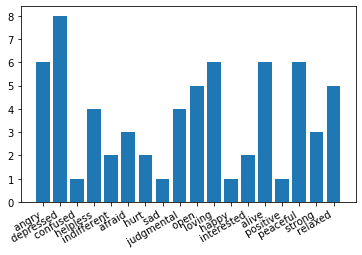

In [31]:
sentiment_analyse(cleaned_text)

fig, ax1 = plt.subplots()
ax1.bar(w.keys(), w.values())
fig.autofmt_xdate()
plt.savefig('graph.png')
plt.show()